In [130]:
# importing the required module 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde
from statistics import mean, stdev
from scipy.stats import sem
import scipy.stats as stats

In [131]:
#Optional for disabling warnings 
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [132]:
#Set figure resolution to 300dpi
import matplotlib as mpl
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [133]:
df = pd.read_excel (r'./Fall24_Bio212.xlsx', index_col=0) 
df.describe()

,ID,SIS User ID,Exam 1,Exam1_percent,Exam1_score,Study_Guide_avg,Non_Study_Guide_avg
count,28.000000,27.0,22.000000,22.000000,22.000000,5.000000,17.000000
mean,170879.571429,900000000.0,56.090909,0.692480,69.248036,84.444444,64.778504
std,78946.472902,0.0,15.344176,0.189434,18.943427,9.222148,18.877022
min,2673.000000,900000000.0,25.000000,0.308642,30.864198,75.308642,30.864198
25%,171982.250000,900000000.0,44.750000,0.552469,55.246914,75.308642,54.320988
50%,198200.000000,900000000.0,55.000000,0.679012,67.901235,85.185185,61.111111
75%,221233.750000,900000000.0,68.375000,0.844136,84.413580,90.123457,77.777778
max,242753.000000,900000000.0,79.000000,0.975309,97.530864,96.296296,97.530864


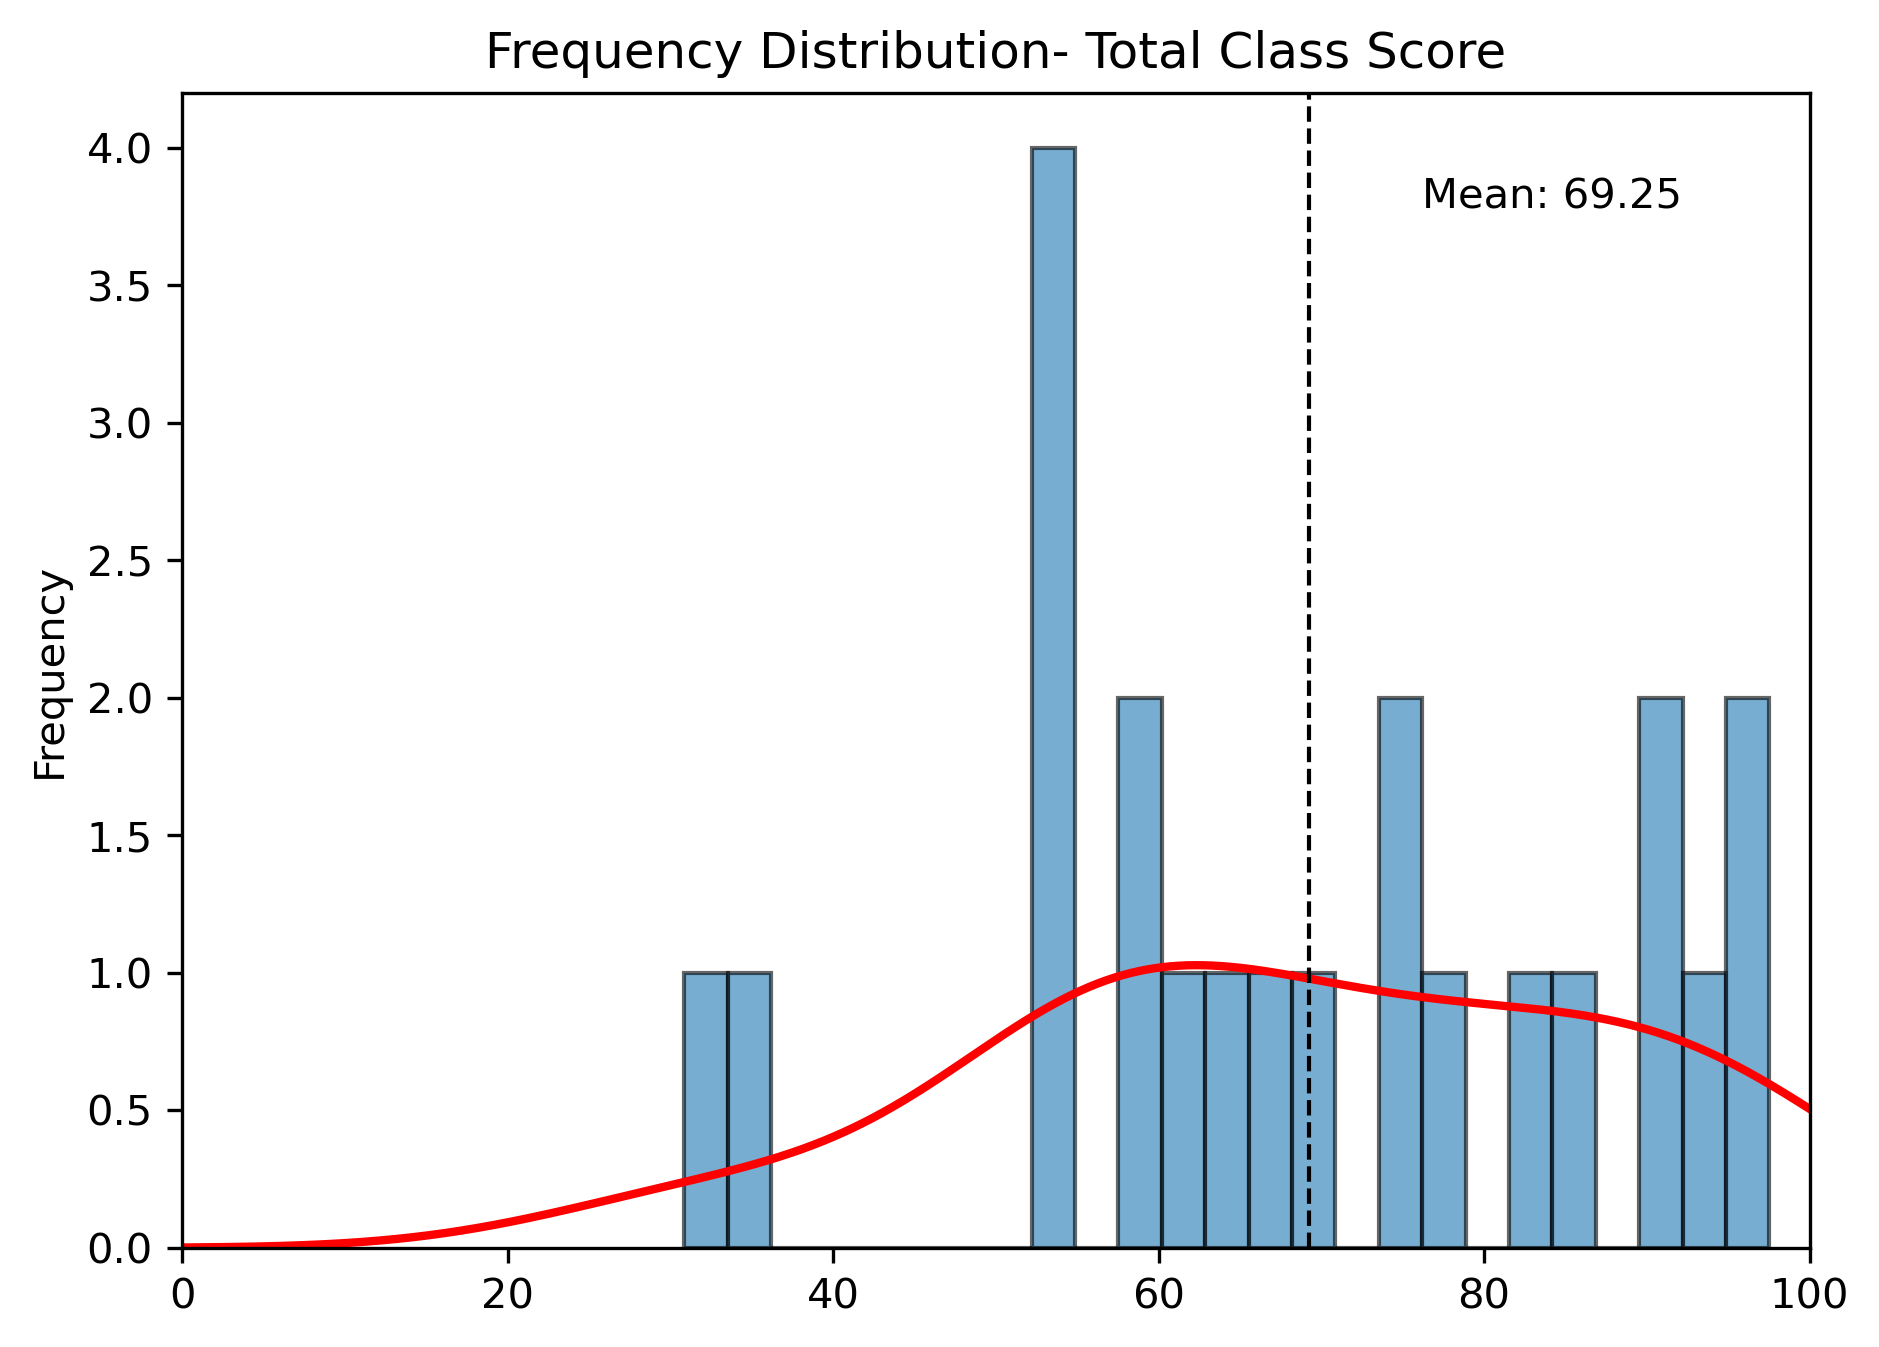

In [134]:
# Plot Histogram on x
x1 = df['Exam1_score'].dropna()

# Define number of bins for the histogram
bins = 25

# Plot histogram with actual frequency (density=False)
count_x1, bins_x1, _ = plt.hist(x1, bins=bins, edgecolor='k', alpha=0.6, density=False)
plt.gca().set(title='Frequency Distribution- Total Class Score', ylabel='Frequency')
plt.xlim(0, 100)

# Add KDE curve
kde_x1 = gaussian_kde(x1)
x1_range = np.linspace(0, 100, 1000)  # Generate x-values for KDE curve

# Scale KDE by the number of data points and the bin width to match the histogram's frequency scale
bin_width_x1 = bins_x1[1] - bins_x1[0]
plt.plot(x1_range, kde_x1(x1_range) * len(x1) * bin_width_x1, color='r', linewidth=2)

# Plot vertical line for mean
plt.axvline(x1.mean(), color='k', linestyle='dashed', linewidth=1)

# Add mean text
min_ylim, max_ylim = plt.ylim()
plt.text(x1.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(x1.mean()))

# Display the plot
plt.show()

In [135]:
df['Exam1_curved'] = df.Exam1_score+5.9
df.describe()

,ID,SIS User ID,Exam 1,Exam1_percent,Exam1_score,Study_Guide_avg,Non_Study_Guide_avg,Exam1_curved
count,28.000000,27.0,22.000000,22.000000,22.000000,5.000000,17.000000,22.000000
mean,170879.571429,900000000.0,56.090909,0.692480,69.248036,84.444444,64.778504,75.148036
std,78946.472902,0.0,15.344176,0.189434,18.943427,9.222148,18.877022,18.943427
min,2673.000000,900000000.0,25.000000,0.308642,30.864198,75.308642,30.864198,36.764198
25%,171982.250000,900000000.0,44.750000,0.552469,55.246914,75.308642,54.320988,61.146914
50%,198200.000000,900000000.0,55.000000,0.679012,67.901235,85.185185,61.111111,73.801235
75%,221233.750000,900000000.0,68.375000,0.844136,84.413580,90.123457,77.777778,90.313580
max,242753.000000,900000000.0,79.000000,0.975309,97.530864,96.296296,97.530864,103.430864


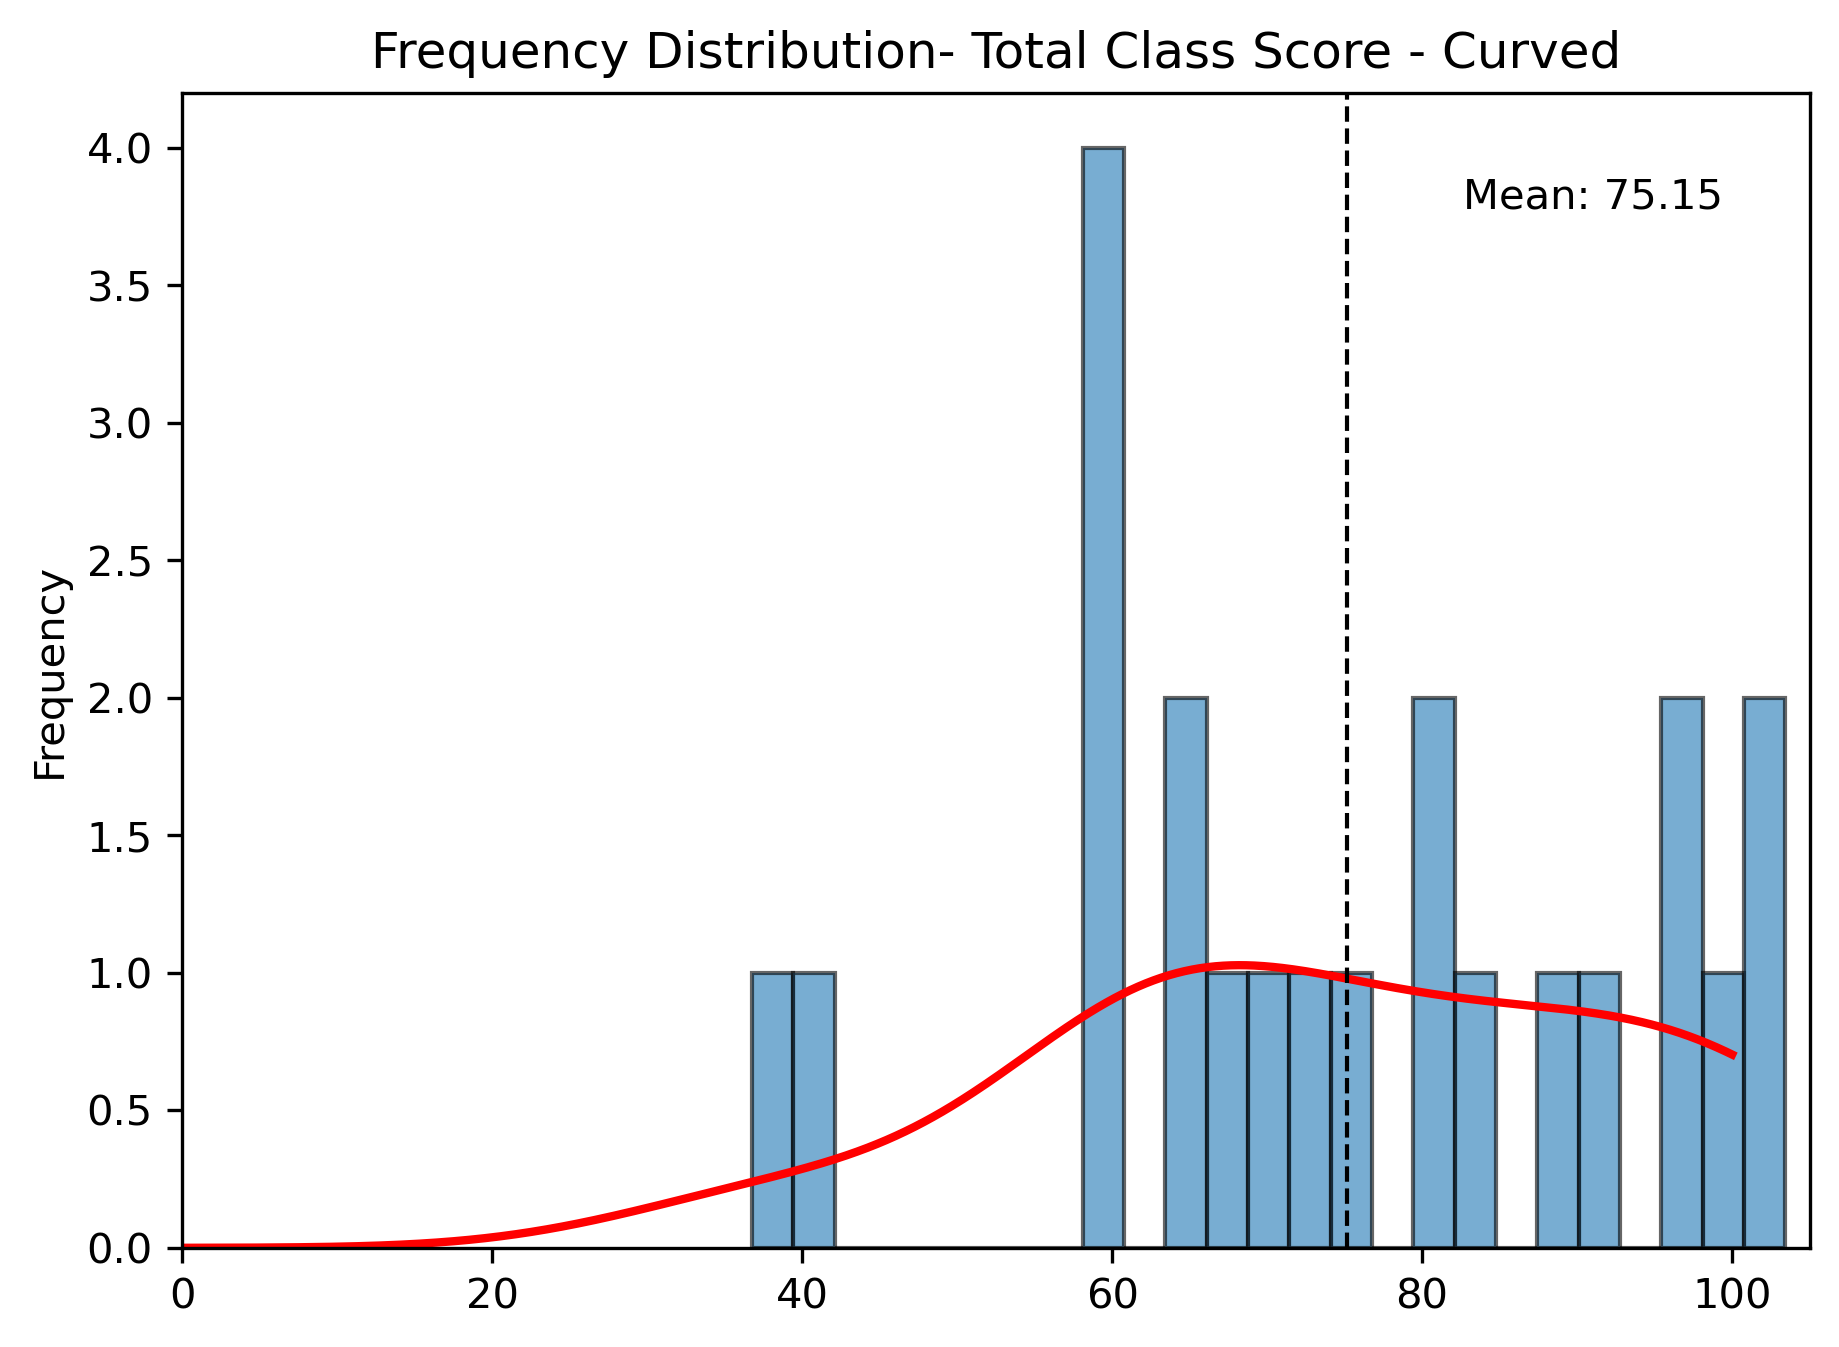

In [136]:
# Setup for inline plots and figure size
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':300})

# Plot Histogram on x
x1 = df['Exam1_curved'].dropna()

# Define number of bins for the histogram
bins = 25

# Plot histogram with actual frequency (density=False)
count_x1, bins_x1, _ = plt.hist(x1, bins=bins, edgecolor='k', alpha=0.6, density=False)
plt.gca().set(title='Frequency Distribution- Total Class Score - Curved', ylabel='Frequency')
plt.xlim(0, 105)

# Add KDE curve
kde_x1 = gaussian_kde(x1)
x1_range = np.linspace(0, 100, 1000)  # Generate x-values for KDE curve

# Scale KDE by the number of data points and the bin width to match the histogram's frequency scale
bin_width_x1 = bins_x1[1] - bins_x1[0]
plt.plot(x1_range, kde_x1(x1_range) * len(x1) * bin_width_x1, color='r', linewidth=2)

# Plot vertical line for mean
plt.axvline(x1.mean(), color='k', linestyle='dashed', linewidth=1)

# Add mean text
min_ylim, max_ylim = plt.ylim()
plt.text(x1.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(x1.mean()))

# Display the plot
plt.show()

In [137]:
df['Studyguide_curved'] = df.Study_Guide_avg+5.9
df['No_Studyguide_curved'] = df.Non_Study_Guide_avg+5.9
df.describe()

,ID,SIS User ID,Exam 1,Exam1_percent,Exam1_score,Study_Guide_avg,Non_Study_Guide_avg,Exam1_curved,Studyguide_curved,No_Studyguide_curved
count,28.000000,27.0,22.000000,22.000000,22.000000,5.000000,17.000000,22.000000,5.000000,17.000000
mean,170879.571429,900000000.0,56.090909,0.692480,69.248036,84.444444,64.778504,75.148036,90.344444,70.678504
std,78946.472902,0.0,15.344176,0.189434,18.943427,9.222148,18.877022,18.943427,9.222148,18.877022
min,2673.000000,900000000.0,25.000000,0.308642,30.864198,75.308642,30.864198,36.764198,81.208642,36.764198
25%,171982.250000,900000000.0,44.750000,0.552469,55.246914,75.308642,54.320988,61.146914,81.208642,60.220988
50%,198200.000000,900000000.0,55.000000,0.679012,67.901235,85.185185,61.111111,73.801235,91.085185,67.011111
75%,221233.750000,900000000.0,68.375000,0.844136,84.413580,90.123457,77.777778,90.313580,96.023457,83.677778
max,242753.000000,900000000.0,79.000000,0.975309,97.530864,96.296296,97.530864,103.430864,102.196296,103.430864


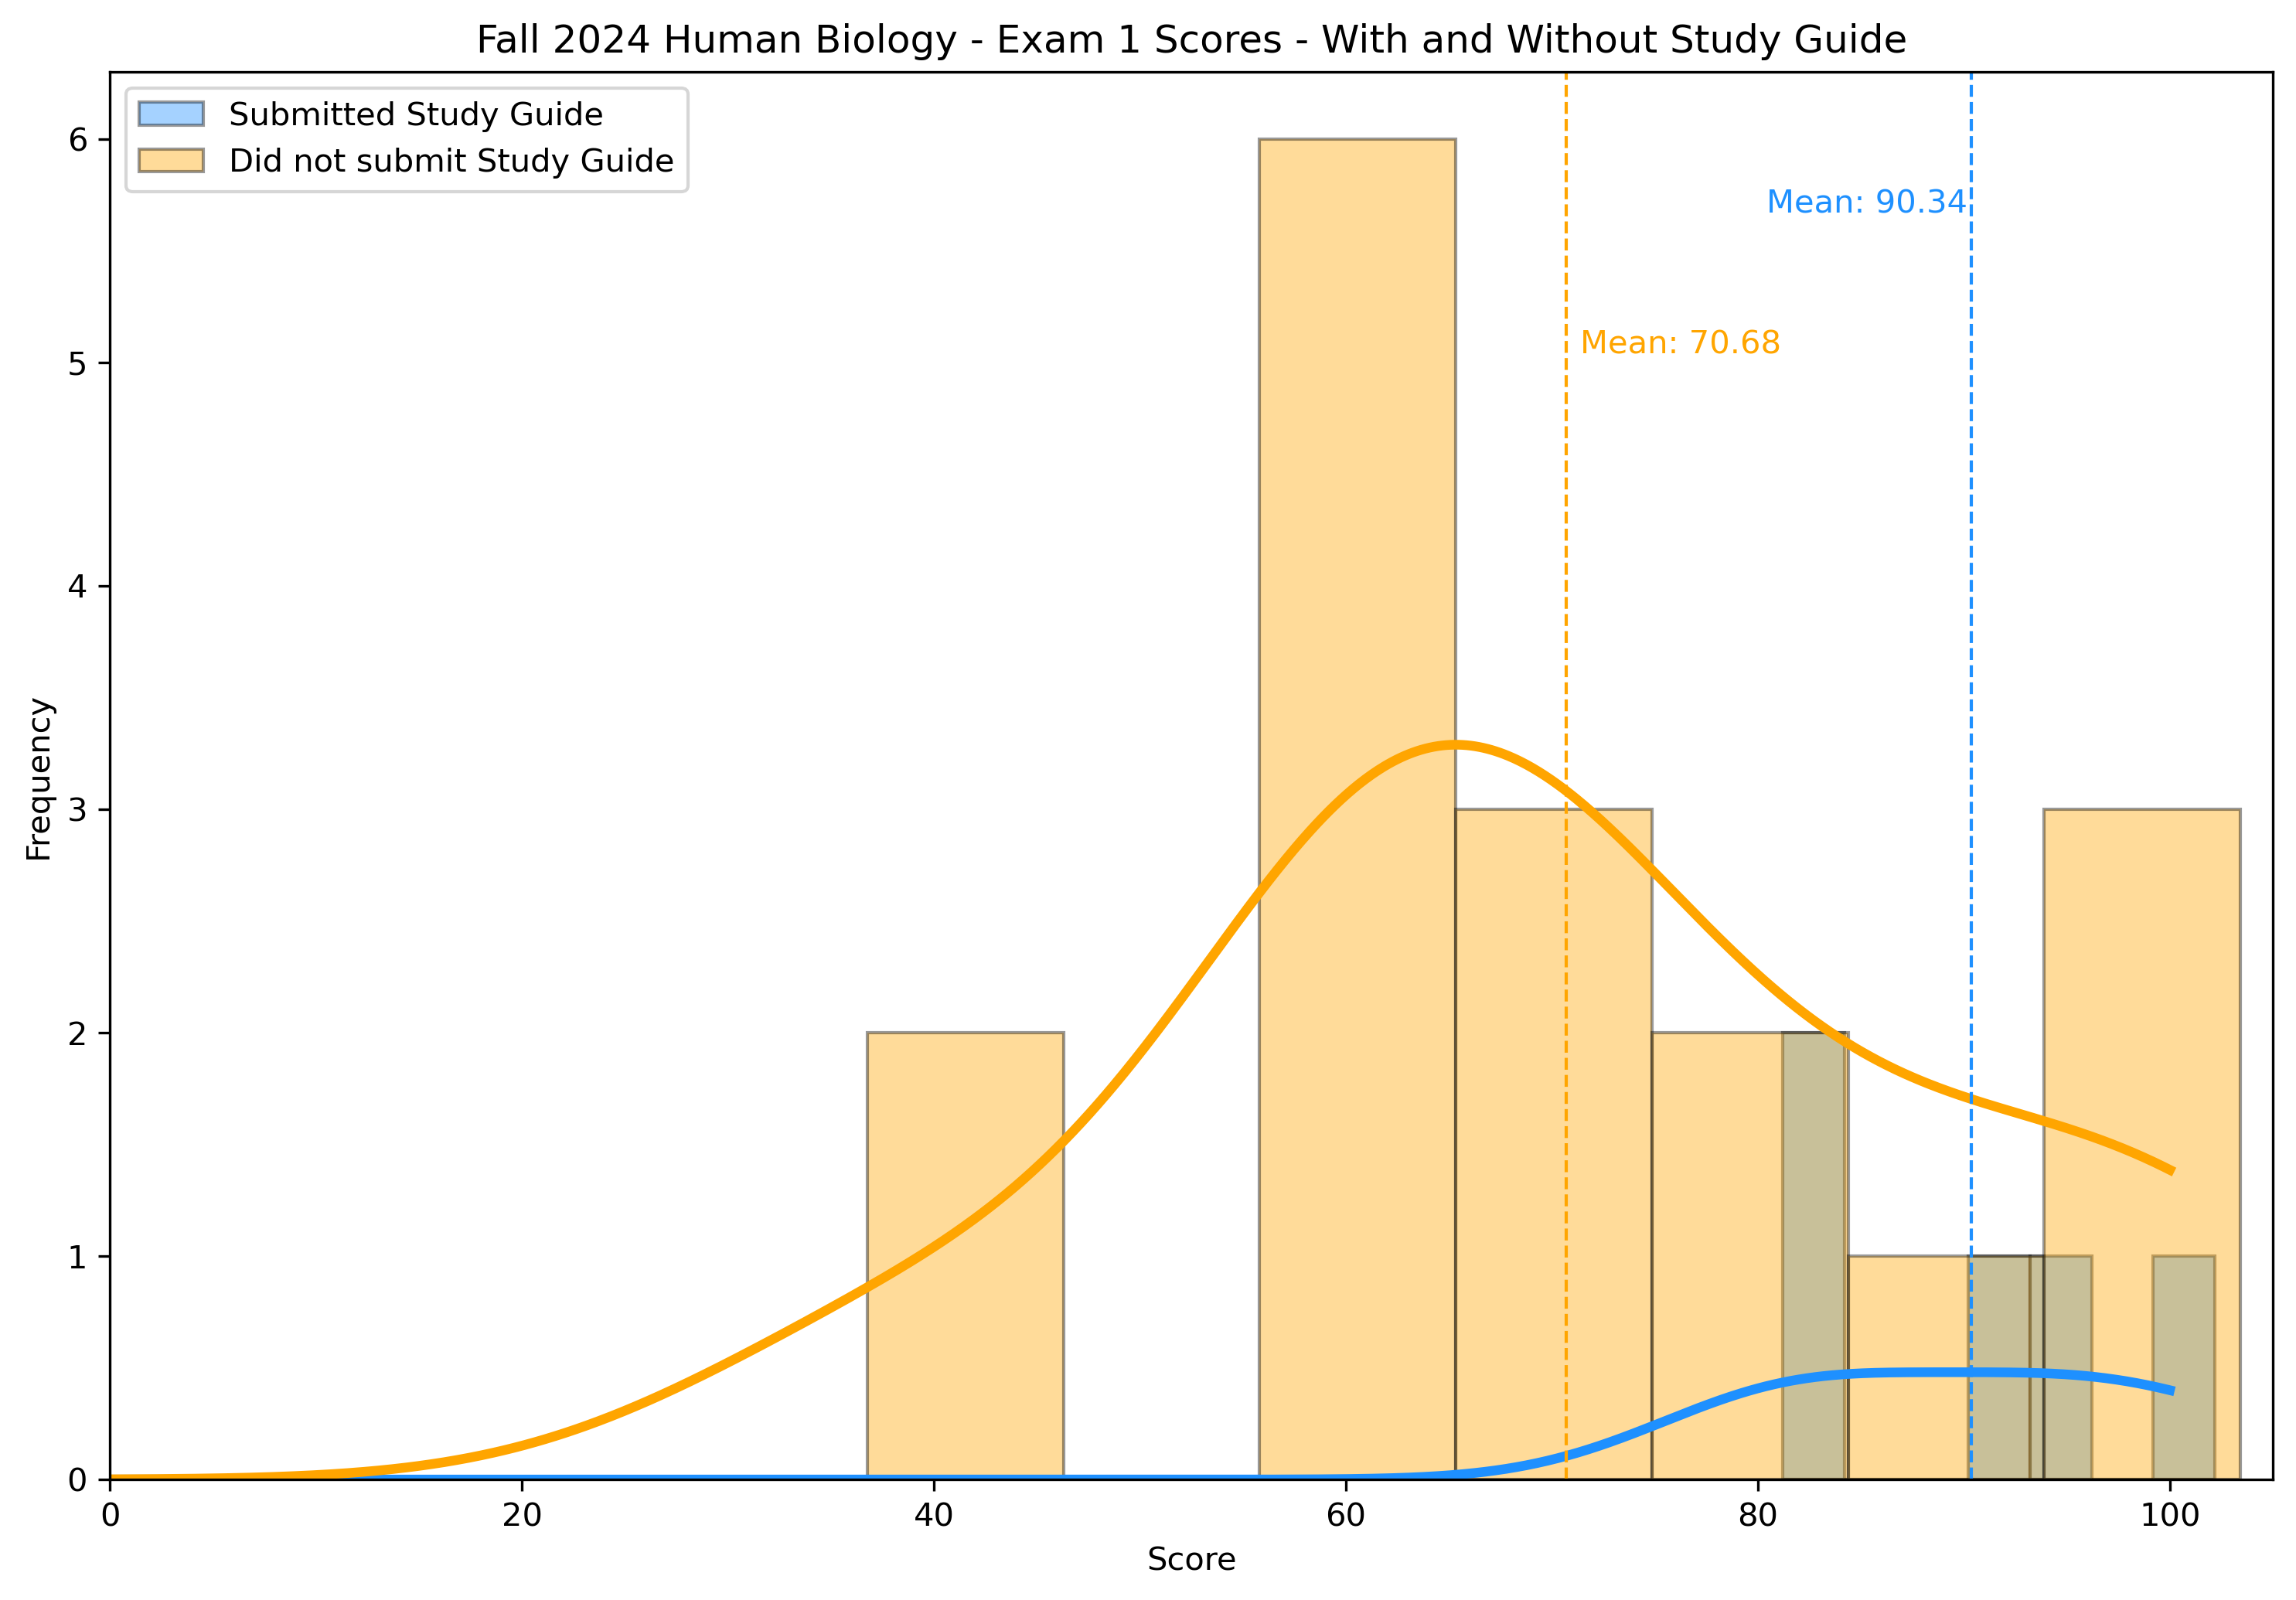

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

# Sample data for groups x2 and x3
x2 = df.Studyguide_curved.dropna()  # Assuming x2 is for "Submitted Study Guide"
x3 = df.No_Studyguide_curved.dropna()  # Assuming x3 is for "Did not submit Study Guide"

# Number of bins for the histogram
bins = 7

# Setup for inline plots and figure size
plt.figure(figsize=(10, 7), dpi=300)

# Plot histograms for both groups with actual frequency values (density=False)
count_x2, bins_x2, _ = plt.hist(x2, bins=bins, color="dodgerblue", label="Submitted Study Guide", 
                                alpha=0.4, edgecolor='k')
count_x3, bins_x3, _ = plt.hist(x3, bins=bins, color="orange", label="Did not submit Study Guide", 
                                alpha=0.4, edgecolor='k')

# KDE for group x2
kde_x2 = gaussian_kde(x2)
x2_range = np.linspace(0, 100, 1000)  # Generate x-values for KDE curve

# Scale KDE by the number of data points and the bin width to match histogram scale
bin_width_x2 = bins_x2[1] - bins_x2[0]
plt.plot(x2_range, kde_x2(x2_range) * len(x2) * bin_width_x2, color='dodgerblue', linewidth=3)

# KDE for group x3
kde_x3 = gaussian_kde(x3)
x3_range = np.linspace(0, 100, 1000)  # Generate x-values for KDE curve

# Scale KDE by the number of data points and the bin width to match histogram scale
bin_width_x3 = bins_x3[1] - bins_x3[0]
plt.plot(x3_range, kde_x3(x3_range) * len(x3) * bin_width_x3, color='orange', linewidth=3)

# Add vertical lines for the means
plt.axvline(x2.mean(), color='dodgerblue', linestyle='dashed', linewidth=1)
plt.axvline(x3.mean(), color='orange', linestyle='dashed', linewidth=1)

# Add text labels for means
min_ylim, max_ylim = plt.ylim()
plt.text(x2.mean() * 0.89, max_ylim * 0.9, 'Mean: {:.2f}'.format(x2.mean()), color="dodgerblue")
plt.text(x3.mean() * 1.01, max_ylim * 0.8, 'Mean: {:.2f}'.format(x3.mean()), color="orange")

# Customize plot
plt.xlim(0, 105)
plt.legend()
plt.gca().set(title='Fall 2024 Human Biology - Exam 1 Scores - With and Without Study Guide',
              ylabel='Frequency', xlabel='Score')

plt.tight_layout()
plt.show()

In [139]:
#Assign the names to the following columns:
sg = df.Studyguide_curved.dropna() 
nosg = df.No_Studyguide_curved.dropna()

In [140]:
#Calculate the mean and standard error of mean (SEM)
SG_MEAN = mean(sg)
SG_SEM = sem(sg)
NOSG_MEAN = mean(nosg)
NOSG_SEM = sem(nosg)

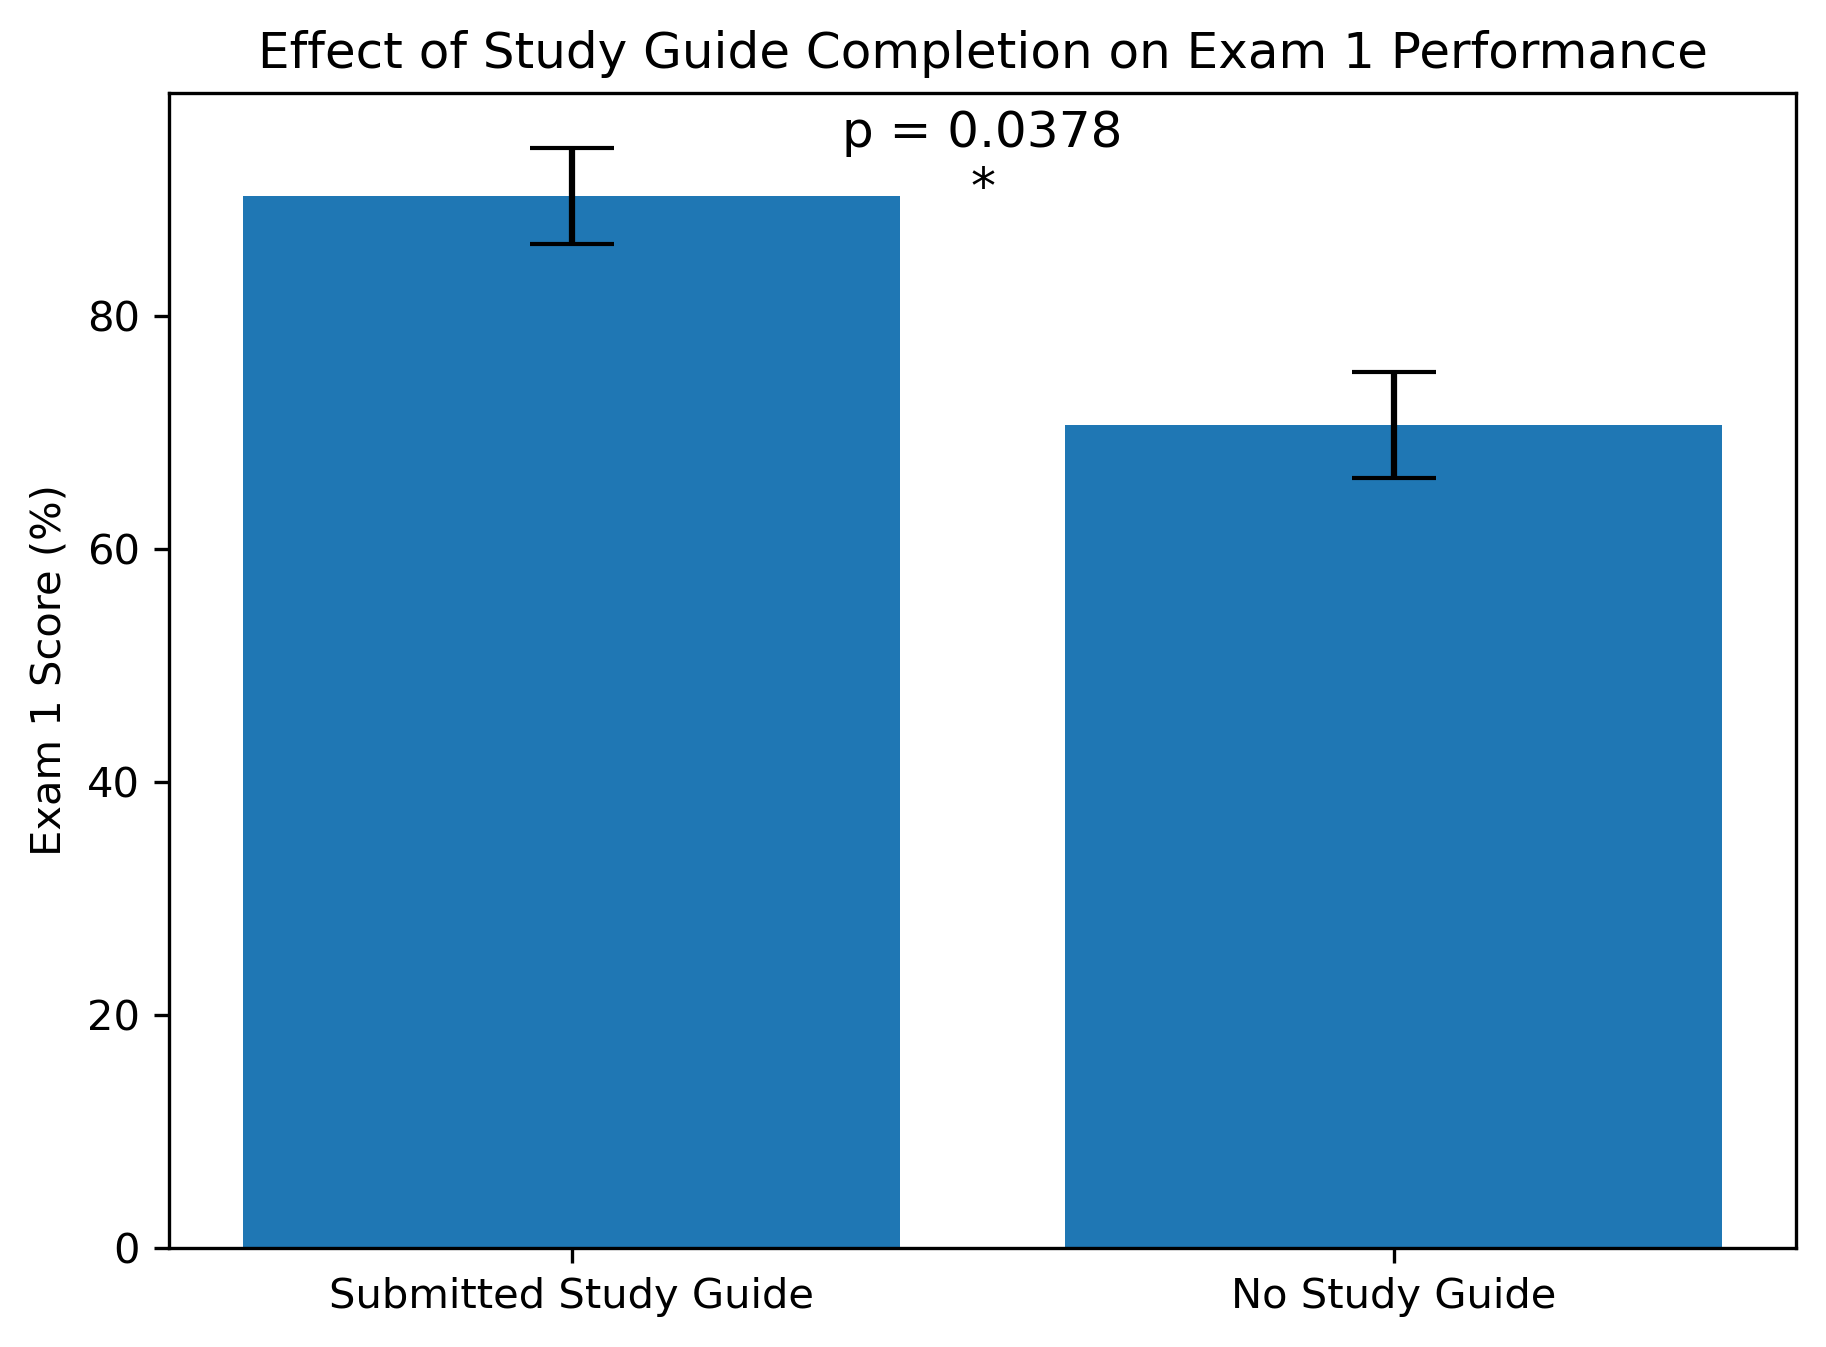

In [141]:
# Perform the t-test
res = stats.ttest_ind(sg, nosg, equal_var=True)
p_value = res.pvalue

# Build the bar plot
plt.bar(['Submitted Study Guide', 'No Study Guide'], [SG_MEAN, NOSG_MEAN], yerr=[SG_SEM, NOSG_SEM], capsize=10)
plt.ylabel('Exam 1 Score (%)')
plt.title('Effect of Study Guide Completion on Exam 1 Performance')

# Determine significance label based on p-value
if p_value < 0.001:
    significance_label = '***'
elif p_value < 0.01:
    significance_label = '**'
elif p_value < 0.05:
    significance_label = '*'
else:
    significance_label = 'n.s.'  # Not significant

# Add the p-value or significance label above the bars
max_y = max(SG_MEAN + SG_SEM, NOSG_MEAN + NOSG_SEM)
plt.text(0.5, max_y * 0.95, f'p = {p_value:.4f}\n{significance_label}', ha='center', fontsize=12)

# Show the plot
plt.show()

In [142]:
from IPython.display import HTML, display
from scipy import stats

# Perform the t-test
res = stats.ttest_ind(sg, nosg, equal_var=True)

# Extract the p-value from the result
p_value = res.pvalue

# Conditional message based on the p-value
if p_value < 0.05:
    significance = "statistically significant"
    comparison = "lower"
else:
    significance = "not statistically significant"
    comparison = "higher"

# Generate the output text
output_text = f"The result of your t-test p-value is: {p_value:.4f}, which is {comparison} than 0.05, making the resulting comparison {significance}."

# Display the output with larger font size using HTML
display(HTML(f'<p style="font-size:40px;">{output_text}</p>'))